In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [3]:
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import statsmodels.api as sm

# 1. 선형 회귀모델

+ hypothesis
    - y = w[0] * x[0] + w[1] * x[1] + ... + b


+ 종류
    - 일반 선형회귀 모델
    - 릿지 선형회귀 모델
    - 라쏘 선형회귀 모델
    - 엘라스틱넷 선형회귀 모델

w[0]: 0.393906  b: -0.031804


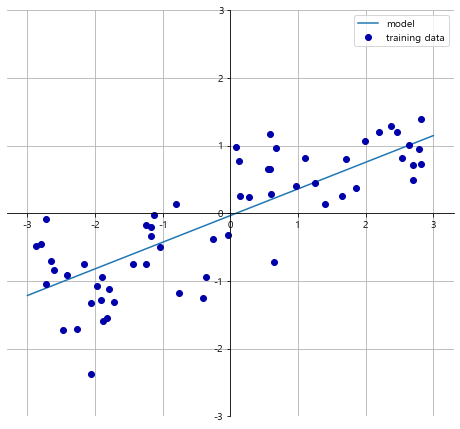

In [6]:
mglearn.plots.plot_linear_regression_wave()

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

훈련 점수 :  0.6700890315075756
테스트 점수 :  0.65933685968637
기울기 : [0.39390555], 절편 : -0.031804343026759746


In [13]:
from scipy import stats

result = stats.linregress(X_train.reshape(-1), y_train)
result

LinregressResult(slope=0.39390555116733944, intercept=-0.031804343026759774, rvalue=0.8185896600297219, pvalue=6.4641460612798074e-12, stderr=0.042149264068325865, intercept_stderr=0.07819620564438914)

### (1) 사례 1 : 전기 생산량과 소비량

+ 귀무 가설 : 전기 생산량과 소비량은 상관 관계가 없다.
+ 대립 가설 : 전기 생산량과 소비량은 상관 관계가 있다.

In [14]:
# 월별 전기 사용량(백만 Kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

In [15]:
##### 통계적 분석

result = stats.linregress(X, y)
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)

In [17]:
##### 머신 러닝
X_arr = np.array(X)
X_arr = X_arr.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_arr, y)

print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

기울기 : [0.49560324], 절편 : 0.919581428068942


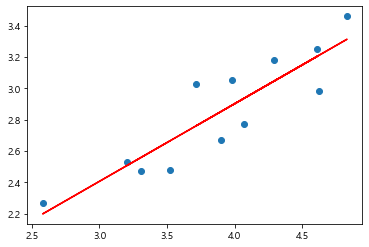

In [19]:
plt.scatter(X, y)
plt.plot(X, lr.coef_ * X + lr.intercept_, c="red")

In [22]:
##### 생산량이 5일때 사용량은 얼마나 될까?
print(lr.coef_ * 5 + lr.intercept_)
print(lr.predict([[5]]))

[3.39759761]
[3.39759761]


### (2) 사례2 : 보스턴 주택 가격

In [25]:
boston = load_boston()
print(boston.data.shape)
#print(boston.target)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [28]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

훈련 점수 :  0.7697699488741149
테스트 점수 :  0.6354638433202129
